# Introduction to the dataset

Importing all the necessary packages required for the project

In [1]:
import numpy as np
import pandas as pd
import tkinter as tk
import pickle
import tkinter.font as font
import matplotlib.pyplot as plt
import seaborn as sns     
import datetime
import string
import random
import statistics as st
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from pandas_profiling import ProfileReport
from tkintermapview import TkinterMapView
import tkintermapview
from tkinter import Frame
from tkinter import *
from tkinter import messagebox

Loading the data

In [2]:
data=pd.read_csv("uber.csv")


Finding the shape of the data

In [3]:
data.shape

(200000, 9)

Finding the no of columns in the data

In [4]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

Viewing the first few rows of the dataset

In [5]:
data.head()

Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

# Data Preparation

# Filling of null values

Dropping the unnamed column

In [6]:
data=data.drop(['Unnamed: 0'],axis=1)

Checking for missing values

In [7]:
data.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Filling the missing values

In [8]:
data=data.fillna(method='bfill')

In [ ]:
data.duplicates().any()

# Treating of outliers

# Passenger count column

Checking for outliers 

In [9]:
data.passenger_count.value_counts()

1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         709
208         1
Name: passenger_count, dtype: int64

Visualizing using boxplot

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passenger_count'>

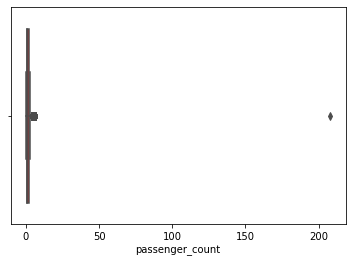

In [10]:
sns.boxplot(data['passenger_count'],color='red')

Finding the central tendencies to treat outliers

In [11]:

print("Mean of fare prices is % s "
         % (st.mean(data['passenger_count'])))

print("Median of fare prices is % s "
         % (st.median(data['passenger_count'])))

print("Standard Deviation of Fare Prices is % s "
                % (st.stdev(data['passenger_count'])))

Mean of fare prices is 1.684535 
Median of fare prices is 1.0 
Standard Deviation of Fare Prices is 1.385996550755879 


Treating the outliers by replacing them with median

In [12]:
median = float(data['passenger_count'].median())
data["passenger_count"] = np.where(data["passenger_count"] > 6, median, data['passenger_count'])

In [13]:
data["passenger_count"] = np.where(data["passenger_count"] ==0, median, data['passenger_count'])

Checking the value count after treating outliers

In [14]:
data.passenger_count.value_counts()

1.0    139135
2.0     29428
5.0     14009
3.0      8881
4.0      4276
6.0      4271
Name: passenger_count, dtype: int64

Visualizing after treating outliers

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='passenger_count', ylabel='count'>

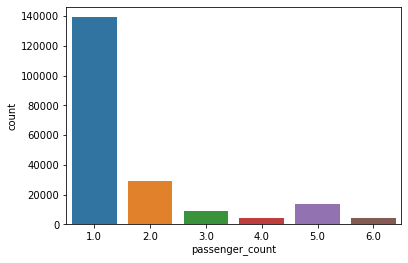

In [15]:
sns.countplot(data['passenger_count'])

# Fare amount column

Checking for outliers 

In [16]:
data.fare_amount.value_counts()

6.50      9684
4.50      8247
8.50      7521
5.70      5858
5.30      5838
          ... 
140.25       1
190.00       1
45.16        1
28.20        1
89.10        1
Name: fare_amount, Length: 1244, dtype: int64

Finding the largest fare amount paid by the customers

In [17]:
data.fare_amount.max()

499.0

In [18]:
data.fare_amount.nlargest()

170081    499.0
4292      350.0
185325    275.0
71715     250.0
197493    230.0
Name: fare_amount, dtype: float64

Finding the central tendencies to treat outliers

In [19]:
print("Mean of fare prices is % s "
         % (st.mean(data['fare_amount'])))

print("Median of fare prices is % s "
         % (st.median(data['fare_amount'])))

print("Standard Deviation of Fare Prices is % s "
                % (st.stdev(data['fare_amount'])))

Mean of fare prices is 11.35995525 
Median of fare prices is 8.5 
Standard Deviation of Fare Prices is 9.901776225069899 


Treating the outliers by replacing them with median

In [20]:
med = float(data['fare_amount'].median())
data["fare_amount"] = np.where(data["fare_amount"] < 0, med, data['fare_amount'])
data["fare_amount"] = np.where(data["fare_amount"] > 499, med, data['fare_amount'])

Visualizing using distplot after treating outliers

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

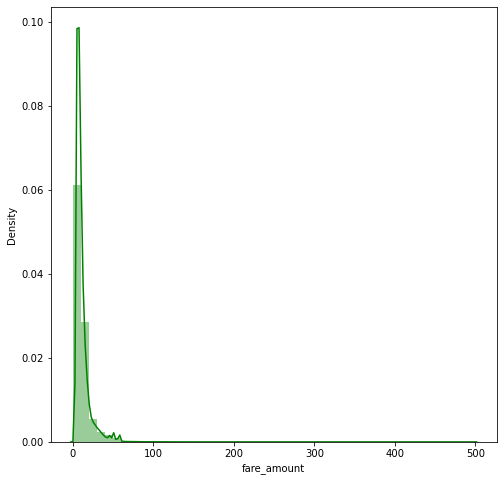

In [21]:
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(data.fare_amount,color='green')

The Target Variable seems to be be highly skewed, with most datapoints lieing near 0.

Visualizing using boxplot after treating outliers

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

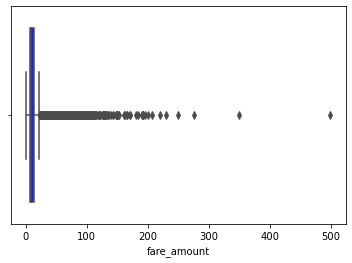

In [22]:
sns.boxplot(data['fare_amount'],color='blue')

# Feature Extraction

 Adding another column in the dataset to find when the customer started his journey

In [23]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['Hour'] = data['pickup_datetime'].apply(lambda time: time.hour)

Visualizing the created column using histogram

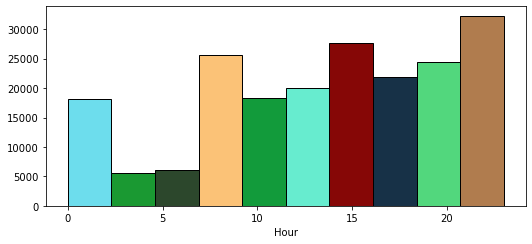

In [24]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
N, bins, patches = ax.hist(data.Hour, edgecolor='black', linewidth=1)
plt.xlabel('Hour')
for i in range(len(N)):
   patches[i].set_facecolor("#" + ''.join(random.choices("ABCDEF" + string.digits, k=6)))
plt.show()

we can observe that the most of the taxi were taken in the evening and night time and the least during morning hours

Adding another column to determine how much distance is travelled during the journey.

In [25]:
def haversine (lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [26]:
data['Distance']= haversine(data['pickup_longitude'],data['dropoff_longitude'],data['pickup_latitude'],data['dropoff_latitude'])

Identifing the type of columns in the data

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                200000 non-null  object             
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  200000 non-null  float64            
 6   dropoff_latitude   200000 non-null  float64            
 7   passenger_count    200000 non-null  float64            
 8   Hour               200000 non-null  int64              
 9   Distance           200000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(1), object(1)
memory usage: 15.3+ MB


Viewing the first few rows of the column after feature extraction

In [28]:
data.head()

key  fare_amount           pickup_datetime  \
0    2015-05-07 19:52:06.0000003          7.5 2015-05-07 19:52:06+00:00   
1    2009-07-17 20:04:56.0000002          7.7 2009-07-17 20:04:56+00:00   
2   2009-08-24 21:45:00.00000061         12.9 2009-08-24 21:45:00+00:00   
3    2009-06-26 08:22:21.0000001          5.3 2009-06-26 08:22:21+00:00   
4  2014-08-28 17:47:00.000000188         16.0 2014-08-28 17:47:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.999817        40.738354         -73.999512         40.723217   
1        -73.994355        40.728225         -73.994710         40.750325   
2        -74.005043        40.740770         -73.962565         40.772647   
3        -73.976124        40.790844         -73.965316         40.803349   
4        -73.925023        40.744085         -73.973082         40.761247   

   passenger_count  Hour  Distance  
0              1.0    19  1.683323  
1              1.0    20  2.457590  
2              1.0    21  5.036377  
3              3.0     8  1.661683  
4              5.0    17  4.475450

In [29]:
min_val = data[:].min() 
max_val = data[:].max() 

In [30]:
min_val

key                  2009-01-01 01:15:22.0000006
fare_amount                                  0.0
pickup_datetime        2009-01-01 01:15:22+00:00
pickup_longitude                     -1340.64841
pickup_latitude                       -74.015515
dropoff_longitude                     -3356.6663
dropoff_latitude                     -881.985513
passenger_count                              1.0
Hour                                           0
Distance                                     0.0
dtype: object

In [31]:
max_val

key                  2015-06-30 23:40:39.0000001
fare_amount                                499.0
pickup_datetime        2015-06-30 23:40:39+00:00
pickup_longitude                       57.418457
pickup_latitude                      1644.421482
dropoff_longitude                    1153.572603
dropoff_latitude                      872.697628
passenger_count                              6.0
Hour                                          23
Distance                            16409.239135
dtype: object

# Exploratory data analysis

# Univariate

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance'>

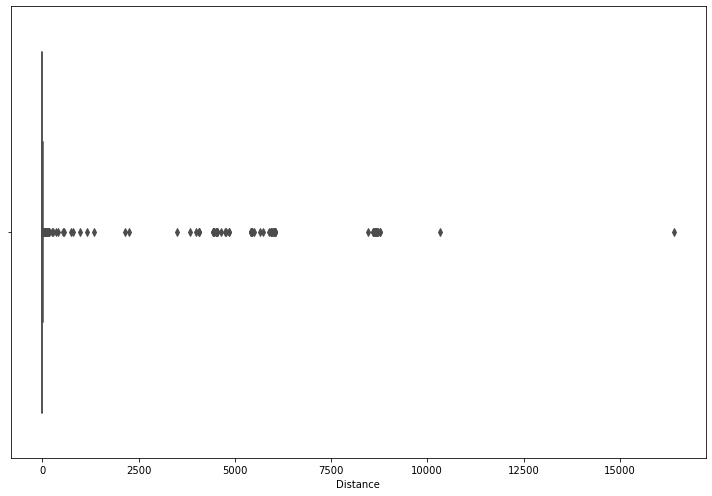

In [32]:
fig = plt.figure(figsize =(10, 7))
sns.boxplot(data['Distance'],color='orange')

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of Pick up Longitude')

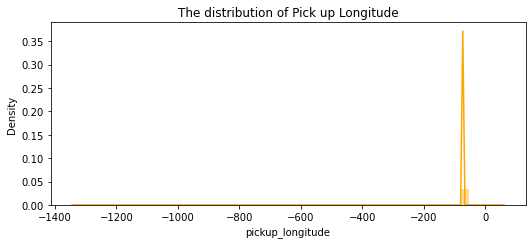

In [33]:
sns.distplot(data['pickup_longitude'],color='orange')
plt.title('The distribution of Pick up Longitude')

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of Drop off Longitude')

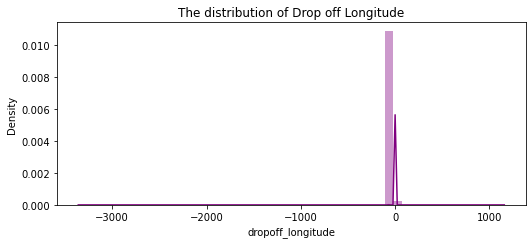

In [34]:
sns.distplot(data['dropoff_longitude'],color='purple')
plt.title('The distribution of Drop off Longitude')

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of drop off Latitude')

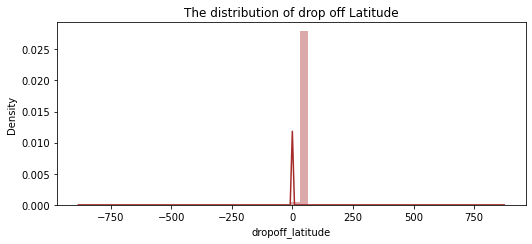

In [35]:
sns.distplot(data['dropoff_latitude'],color='brown')
plt.title('The distribution of drop off Latitude')

C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The distribution of pick up Latitude')

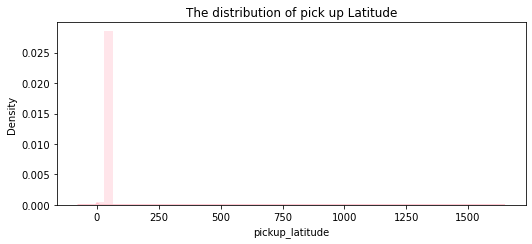

In [36]:
sns.distplot(data['pickup_latitude'],color='pink')
plt.title('The distribution of pick up Latitude')

# Bivariate

Text(0, 0.5, 'passenger_count')

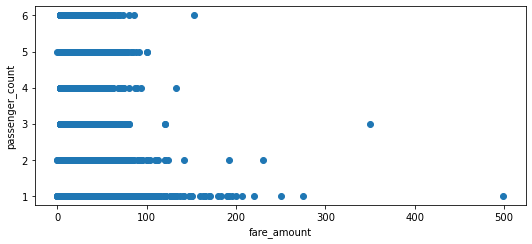

In [37]:
plt.scatter(data['fare_amount'],data['passenger_count'])
plt.xlabel("fare_amount")
plt.ylabel("passenger_count")

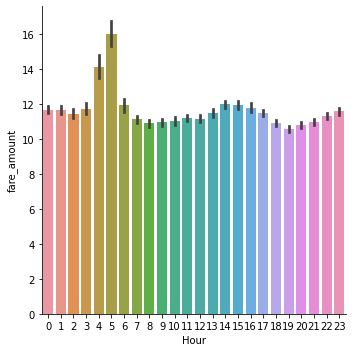

In [38]:
sns.catplot(x="Hour", y="fare_amount",kind="bar",data=data)

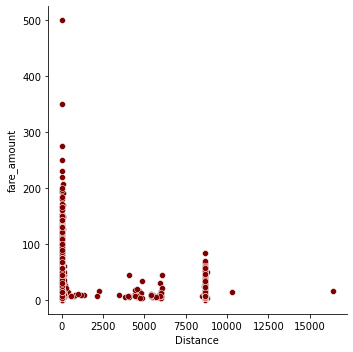

In [39]:
sns.relplot(x="Distance", y="fare_amount", data=data, kind="scatter",color='maroon')

Visualizing the whole dataset using pair plot

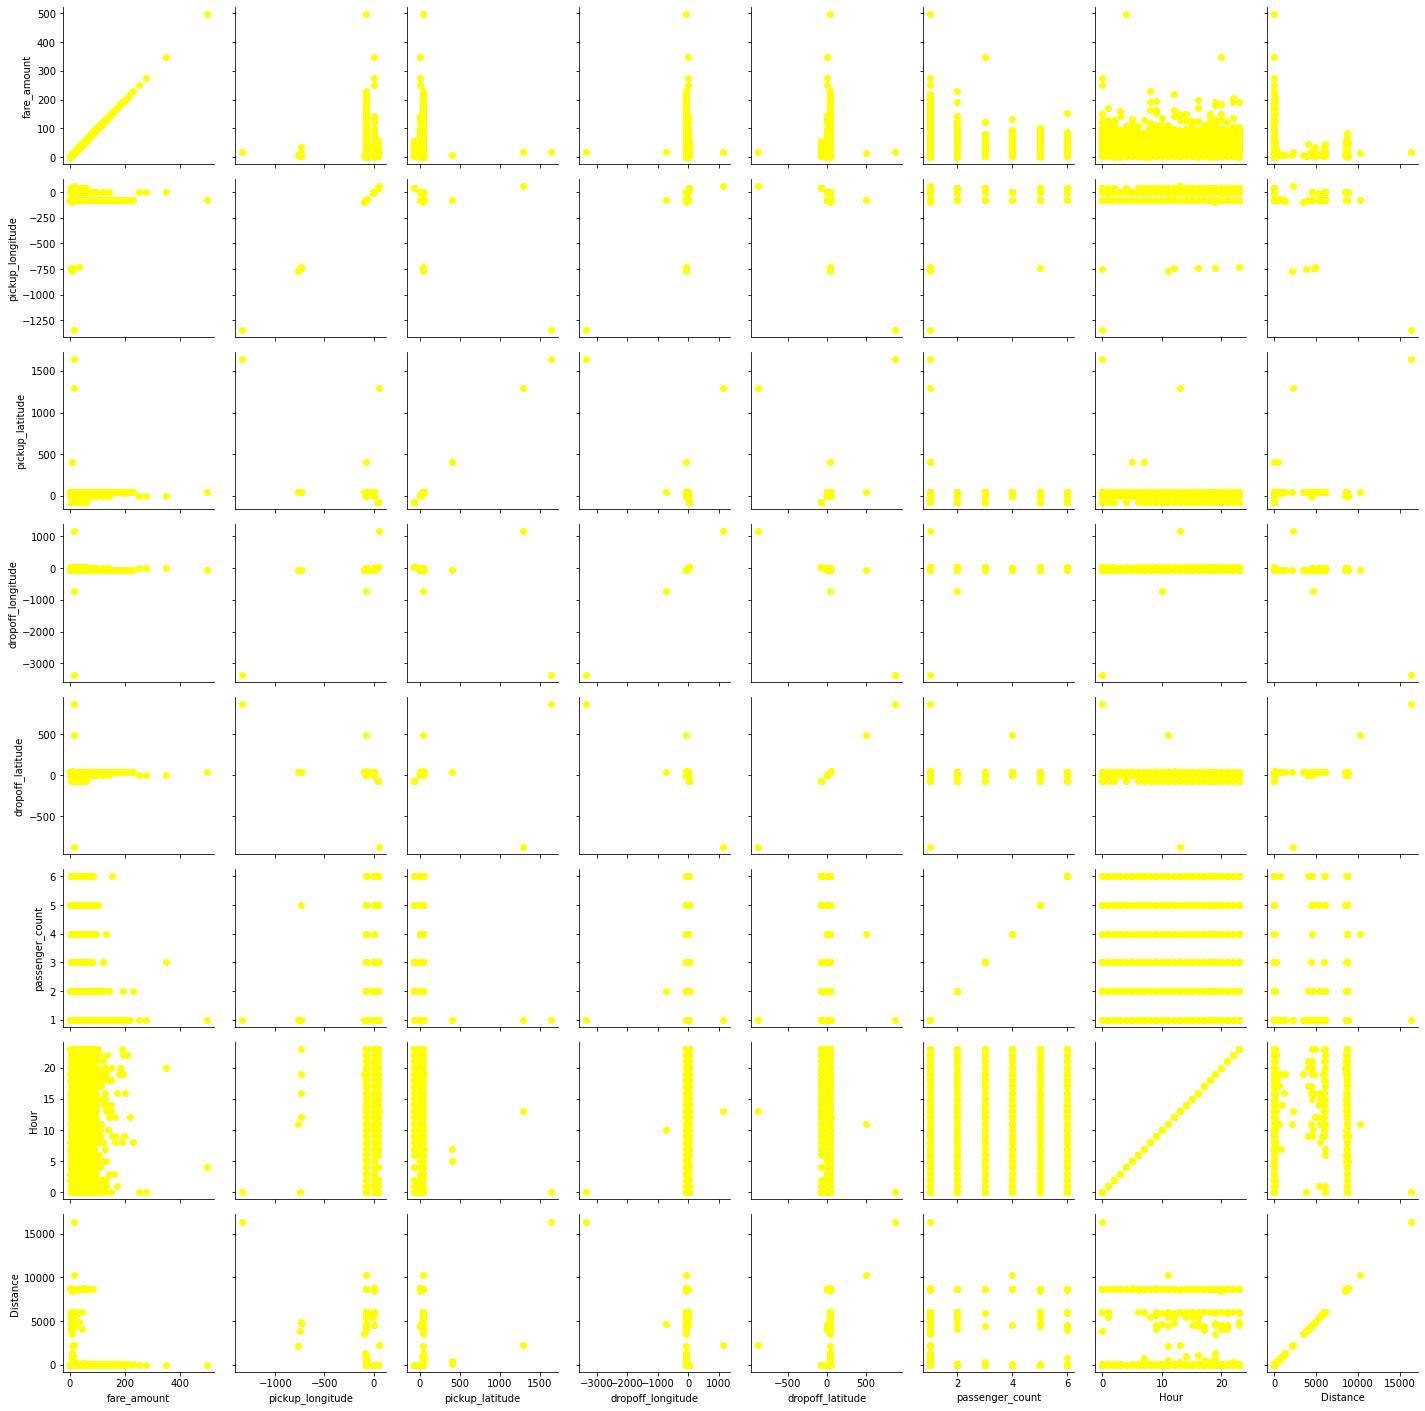

In [40]:
grids=sns.PairGrid(data)
grids.map(plt.scatter,color='yellow')

Creating a whole report for the data

In [41]:
report=ProfileReport(data,title="Pandas Profiling Report")
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
data.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  200000.000000     200000.000000    200000.000000      200000.000000   
mean       11.362122        -72.527638        39.935885         -72.525299   
std         9.896733         11.437787         7.720539          13.117375   
min         0.000000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992065        40.734796         -73.991407   
50%         8.500000        -73.981823        40.752592         -73.980093   
75%        12.500000        -73.967154        40.767158         -73.963659   
max       499.000000         57.418457      1644.421482        1153.572603   

       dropoff_latitude  passenger_count           Hour       Distance  
count     200000.000000    200000.000000  200000.000000  200000.000000  
mean          39.923895         1.687045      13.491335      20.855262  
std            6.794812         1.303746       6.515531     382.963687  
min         -881.985513         1.000000       0.000000       0.000000  
25%           40.733824         1.000000       9.000000       1.215222  
50%           40.753042         1.000000      14.000000       2.121005  
75%           40.768001         2.000000      19.000000       3.875148  
max          872.697628         6.000000      23.000000   16409.239135

Finding the correlation between the columns in the dataset

In [43]:
data.corr()

fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.010435        -0.008463   
pickup_longitude      0.010435          1.000000        -0.816461   
pickup_latitude      -0.008463         -0.816461         1.000000   
dropoff_longitude     0.009138          0.833026        -0.774787   
dropoff_latitude     -0.011175         -0.846324         0.702367   
passenger_count       0.010499         -0.000191        -0.001860   
Hour                 -0.021446          0.002433        -0.003822   
Distance              0.025378          0.105581        -0.062436   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                 0.009138         -0.011175         0.010499   
pickup_longitude            0.833026         -0.846324        -0.000191   
pickup_latitude            -0.774787          0.702367        -0.001860   
dropoff_longitude           1.000000         -0.917010         0.000232   
dropoff_latitude           -0.917010          1.000000        -0.000905   
passenger_count             0.000232         -0.000905         1.000000   
Hour                        0.003478         -0.002545         0.014558   
Distance                    0.056717         -0.079944        -0.001215   

                       Hour  Distance  
fare_amount       -0.021446  0.025378  
pickup_longitude   0.002433  0.105581  
pickup_latitude   -0.003822 -0.062436  
dropoff_longitude  0.003478  0.056717  
dropoff_latitude  -0.002545 -0.079944  
passenger_count    0.014558 -0.001215  
Hour               1.000000 -0.000638  
Distance          -0.000638  1.000000

Visualizing the correlation between the columns using a heatmap

<AxesSubplot:>

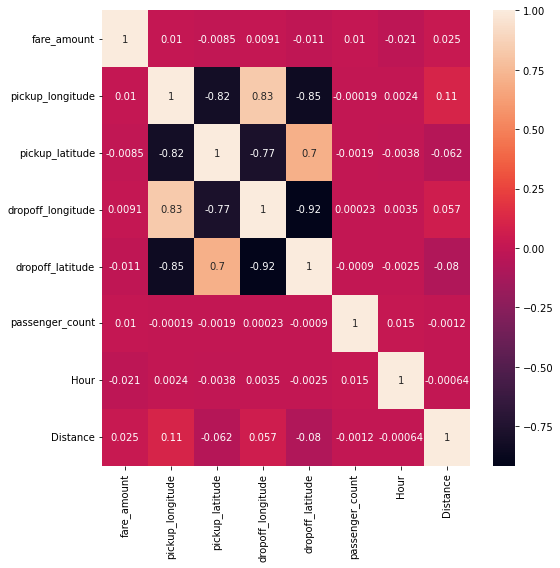

In [44]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)

# Training the model

Defining the training and testing variables

In [45]:
x=data[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude",'Hour']]
y=data["fare_amount"]

Splitting the data for testing and training 

In [46]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.3,random_state=442)

Viewing the shape of x train

In [47]:
xtr.shape

(140000, 5)

Vieiwng the shape of y train

In [48]:
ytr.shape

(140000,)

Fitting the model using Random Forest

In [49]:
model_rf=RandomForestRegressor()
model_rf.fit(xtr,ytr)
ypred=model_rf.predict(xte)
RandomForestRegressor=r2_score(yte,ypred)*100
print("Accuracy of the model is ",RandomForestRegressor)

Accuracy of the model is  78.49866649368415


Fitting the model using Decision Tree

In [50]:
model_dt=DecisionTreeRegressor()
model_dt.fit(xtr,ytr)
ypred=model_dt.predict(xte)
DecisionTreeRegressor=r2_score(yte,ypred)*100
print("Accuracy of the model is ",DecisionTreeRegressor)

Accuracy of the model is  58.45160907938766


Fitting the model using KNeighbors

In [51]:
model_knn=KNeighborsRegressor()
model_knn.fit(xtr,ytr)
ypred=model_knn.predict(xte)
KNeighborsRegressor=r2_score(yte,ypred)*100
print("Accuracy of the model is ",KNeighborsRegressor)

Accuracy of the model is  72.39869479203165


Fitting the model using Linear Regression

In [52]:
model_lr=LinearRegression()
model_lr.fit(xtr,ytr)
ypred=model_lr.predict(xte)
LinearRegression=r2_score(yte,ypred)*100
print("Accuracy of the model is ",LinearRegression)

Accuracy of the model is  0.032743898859433074


In [53]:
model_xgb=XGBRegressor()
model_xgb.fit(xtr,ytr)
ypred=model_xgb.predict(xte)
XGBRegressor=r2_score(yte,ypred)*100
print("Accuracy of the model is ",XGBRegressor)

Accuracy of the model is  77.24621607418254


In [54]:
model_ad=AdaBoostRegressor()
model_ad.fit(xtr,ytr)
ypred=model_ad.predict(xte)
AdaBoostRegressor=r2_score(yte,ypred)*100
print("Accuracy of the model is ",AdaBoostRegressor)

Accuracy of the model is  -94.63752616007403


In [55]:
model_gbr=GradientBoostingRegressor()
model_gbr.fit(xtr,ytr)
ypred=model_gbr.predict(xte)
GradientBoostingRegressor=r2_score(yte,ypred)*100
print("Accuracy of the model is ",GradientBoostingRegressor)

Accuracy of the model is  72.40840905845101


Finding the cross validation score

In [56]:
cv_score=cross_val_score(model_rf,x,y,cv=5)
print("Cross Validation of the model is ",cv_score)

Cross Validation of the model is  [0.73266031 0.78475509 0.80075039 0.76491281 0.7303582 ]


Finding the mean accuracy

In [57]:
mean_accuracy=sum(cv_score)/len(cv_score)
mean_accuracy=mean_accuracy*100
mean_accuracy=round(mean_accuracy,2)
print("Mean Accuracy of the model is ",mean_accuracy)

Mean Accuracy of the model is  76.27


Predicing the model

In [58]:
df={'pickup_longitude':-73.999817,
    'pickup_latitude':40.738354 ,
    'dropoff_longitude':-73.999512,
    'dropoff_latitude':40.723217,
    'Hour':19}

In [59]:
df1=pd.DataFrame(df,index=[0])

In [60]:
df1

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.999817        40.738354         -73.999512         40.723217   

   Hour  
0    19

In [61]:
model_rf.predict(df1)

array([7.725])

# GUI

Saving the model using pickle file

In [62]:
with open('model_li.pkl','wb') as files:
    pickle.dump(model_rf,files)


In [63]:
with open('model_li.pkl','rb') as file:
    duration=pickle.load(file)

In [64]:
def predict():
    
    pickup_longitude = float(scale1.get())
    
    pickup_latitude = float(scale2.get())
    
    dropoff_longitude=float(scale3.get())
    
    dropoff_latitude = float(scale4.get())
    
    Hour=int(cb2.get())
    
    
    inp = np.array([pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude,Hour])
    
    
    prediction = int(duration.predict(inp.reshape(1,5)))
    
    t.insert('1.0',prediction)
    
    if(len(cb2.get())==0):
        message.showerror("details missing","please enter the details")
    

In [65]:
def reset():
    scale1.set(0)
    scale2.set(0)
    scale3.set(0)
    scale4.set(0)
    cb2.delete('0','end')
    t.delete('1.0','end')
def close():
    root.destroy()

Creating a GUI 

In [66]:

from tkinter import ttk
root = tk.Tk()
root.configure(background="lavender")
root.title('fare prediction')
root.geometry("1080x768")

label1_font=font.Font(family='Helvetica',size=30,weight='bold')
label1 = tk.Label(text="UBER FARE PREDICTION",fg="dark slate blue",bg="skyblue",font=label1_font)
label1.pack(anchor=tk.CENTER)

my_label=LabelFrame(root)
my_label.pack(side=BOTTOM)
map_widget=tkintermapview.TkinterMapView(my_label,width=1500,height=440,corner_radius=0)
map_widget.set_position(40.71278,-74.00594)
map_widget.pack(side=BOTTOM)
map_widget.set_address("Auckland,NewZealand",marker=True)
map_widget.set_zoom(75)

label9=Label(root,text="Please select from the following :",font=15)
label9.place(x=10,y=50)

v = DoubleVar()  

scale1 = Scale( root, variable=v, from_=-1340.64841, to=57.418457, orient=HORIZONTAL,sliderlength=40,troughcolor="skyblue",relief=RAISED)  
scale1.place(x=100,y=120) 
  
btn1 = Button(root, text="Pickup Longitude",width=25,bg="darkblue",fg="white")  
btn1.place(x=50,y=90)  
  
label1 = Label(root)  
label1.place(x=100,y=110) 

w = DoubleVar()  

scale2 = Scale( root, variable=w, from_=-74.015515, to=1644.421482, orient=HORIZONTAL,sliderlength=40,troughcolor="skyblue",relief=RAISED)  
scale2.place(x=350,y=120)  
  
btn2 = Button(root, text="Pickup Latitude",bg="darkblue",fg="white",width=25)  
btn2.place(x=300,y=90)
  
label2 = Label(root)  
label2.place(x=350,y=110)

x = DoubleVar()  

scale3 = Scale( root, variable=x, from_=-3356.6663, to=1153.572603, orient=HORIZONTAL,sliderlength=40,troughcolor="skyblue",relief=RAISED)  
scale3.place(x=600,y=120)  
  
btn3 = Button(root, text="Dropoff Longitude",bg="darkblue",fg="white",width=25)  
btn3.place(x=550,y=90)
  
label3 = Label(root)  
label3.place(x=600,y=110)

y = DoubleVar()  

scale4 = Scale( root, variable=y, from_=-881.985513, to=872.697628, orient=HORIZONTAL,sliderlength=60,troughcolor="skyblue",relief=RAISED)  
scale4.place(x=850,y=120)  
  
btn4 = Button(root, text="Dropoff Latitude",bg = "darkblue",fg = "white",width=25) 
btn4.place(x=800,y=90)
  
label4 = Label(root)  
label4.place(x=850,y=110)

def my_upd2():
    cb2.set('1') 
    label8.config(text=cb2.get()+':'+ str(cb2.current())) 
	
months1=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
cb2 = ttk.Combobox(root, values=months1,width=15)
cb2.place(x=1150,y=120)
b2=tk.Button(root,text="set('1')", command=lambda: my_upd2())
b2.place(x=1080,y=120)
label8=tk.Label(root,text='hour',fg='green',font=15)
label8.place(x=1040,y=120)
print(cb2.get())


button1 = tk.Button(root,text='PREDICT',fg="dark slate blue",bg='bisque2',command=predict,font=15)
button1.place(x=420,y=180)

t =tk.Text(root,highlightbackground='green',fg="white",bg="azure4",height=1,width=25,font=15)
t.place(x=550,y=180)

button2_font= font.Font(size=15,weight='bold')
button2 = tk.Button(root,text='RESET',bg="cyan",fg="white",command=reset,font=button2_font)
button2.place(x=520,y=220)

button3_font= font.Font(size=15,weight='bold')
button3 = tk.Button(root,text='CLOSE',bg="CadetBlue1",fg="white",command=close,font=button3_font)
button3.place(x=620,y=220)

root.mainloop()


C:\Users\Home\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
